In [1]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('data1.csv')
df

,X,Y,Class
0,5.50,7.00,1
1,9.40,13.00,1
2,6.00,6.80,1
3,12.50,13.00,0
4,5.50,5.60,1
...,...,...,...
207,12.72,12.05,0
208,11.24,9.73,0
209,14.65,10.31,0
210,14.84,10.78,0


In [3]:
scaler = MinMaxScaler()
df['X'] = scaler.fit_transform(df[['X']])
df['Y'] = scaler.fit_transform(df[['Y']])
df

,X,Y,Class
0,0.279419,0.434318,1
1,0.481597,0.811439,1
2,0.305340,0.421747,1
3,0.642302,0.811439,0
4,0.279419,0.346323,1
...,...,...,...
207,0.653707,0.751728,0
208,0.576983,0.605908,0
209,0.753758,0.642363,0
210,0.763608,0.671904,0


In [4]:
def Algorithm(x , num_clusters):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(x.T, num_clusters, 2, error=0.005, maxiter=1000, init=None) # edit

    cluster_membership = np.argmax(u, axis=0)


    fig, ax = plt.subplots()

    for i in range(num_clusters):
        ax.plot(x[cluster_membership == i, 0], x[cluster_membership == i, 1], 'o', label=f'Cluster {i + 1}')

    i = 1
    for cluster_center in cntr:
        ax.plot(cluster_center[0], cluster_center[1], '*', markersize=20, markeredgewidth=2, label=f'Cluster Center {i}')
        i += 1
    
    ax.set_title(f'Fuzzy C-Means Clustering using {num_clusters} Clusters')
    ax.legend()
    
    plt.show()
    return fpc


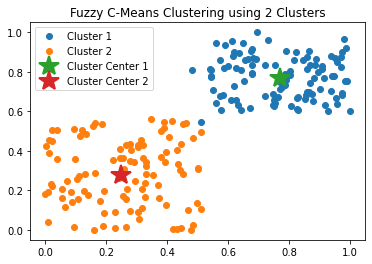

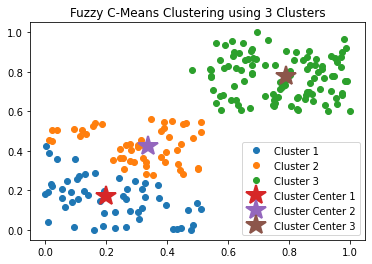

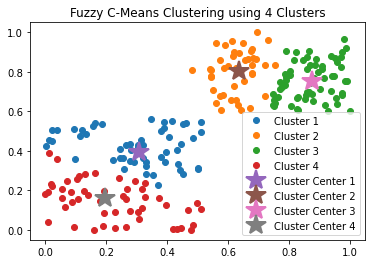

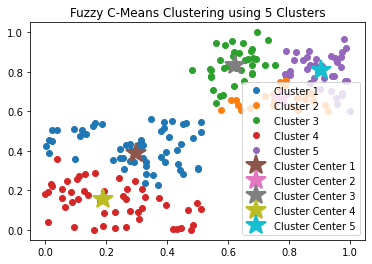

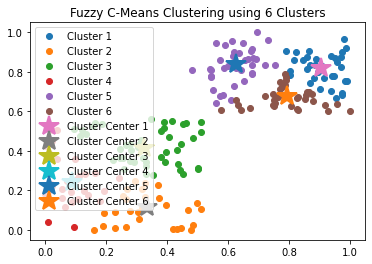

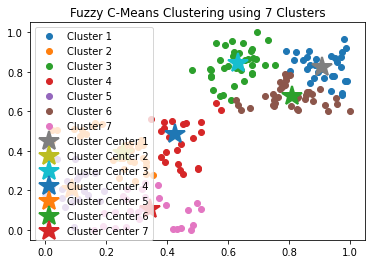

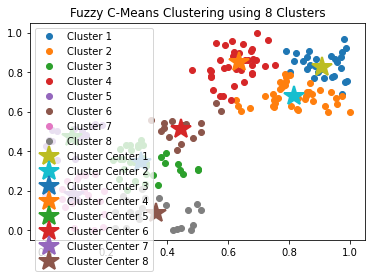

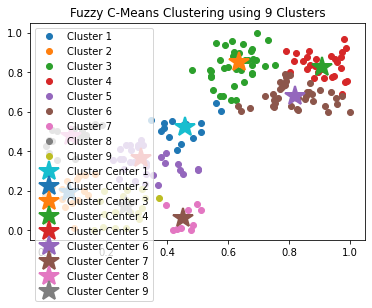

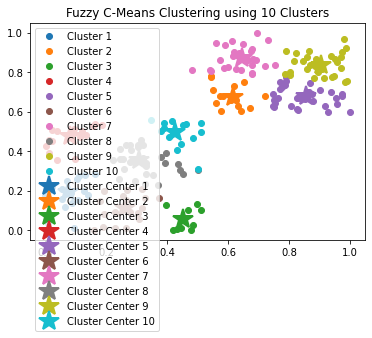

In [5]:
data = df[['X', 'Y']].values
fpcList = []
for cluster in range(2, 11):
    fpc = Algorithm(data, cluster)
    fpcList.append([cluster, fpc])

In [6]:
fpcList

[[2, 0.8685904129765422],
 [3, 0.7288383206234037],
 [4, 0.6482445403580972],
 [5, 0.5978405025465401],
 [6, 0.586394165560296],
 [7, 0.5643391623165177],
 [8, 0.5664952753203003],
 [9, 0.5602752591033864],
 [10, 0.5459221574489436]]